## Exploratory Data Analysis Task @ of LGMVIP

Done By Aashish karn 

### This project aims for the analysis of the terrorism data. I have done Analysis and visualisation of the terrorism data over the world and found the hot zones of terrorism.

Finally did small analysis specialized for Nepal.

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline ensures that the graphs are displayed in the notebook along with the code.
%matplotlib inline  

## 2. Reading Dataset

In [2]:
data =  pd.read_csv('Globalterror.csv' , encoding="latin1")

data

C:\Users\Ashis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## 3. Beginning alaysis

In [4]:
data.isna().sum() , data.shape

(eventid            0
 iyear              0
 imonth             0
 iday               0
 approxdate    172452
                ...  
 INT_LOG            0
 INT_IDEO           0
 INT_MISC           0
 INT_ANY            0
 related       156653
 Length: 135, dtype: int64,
 (181691, 135))

### So, we can see we have 181691 rows and 135 column of our data. But all the columns are not required for our analysis. we can remove those columns and use those which are necessary


In [5]:
print(data["country_txt"].value_counts().idxmax())
print(data["iyear"].value_counts().idxmax())


Iraq
2014


### Consclusion: we can see that the most terrorism was happened in the country Iraq and year of taking place of most terrorism was 2014

In [6]:
data["region_txt"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [7]:
#identifying type of attacks which happeded at most
df_toa = data[data.region_txt == "Middle East & North Africa"]


df_toa.attacktype1_txt.value_counts()

Bombing/Explosion                      30908
Armed Assault                           9273
Assassination                           4206
Hostage Taking (Kidnapping)             2666
Unknown                                 1891
Facility/Infrastructure Attack          1115
Unarmed Assault                          177
Hijacking                                138
Hostage Taking (Barricade Incident)      100
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Major five types of attacks seen in Middle east')

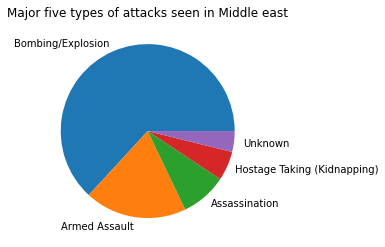

In [8]:
y = df_toa.attacktype1_txt.value_counts().head(5).values


mylabels = df_toa.attacktype1_txt.value_counts().head(5).index


plt.pie(y , labels = mylabels)

plt.title("Major five types of attacks seen in Middle east")

### The region of most terrorist attack is Middle East and North Africa and the least is at Australasia and Oceania
### And the major attack was Bombing which was done more than 30000 times and least attemped attack was Hostage Taking

Text(0.5, 1.0, 'Region of terrorism vs number of attacks')

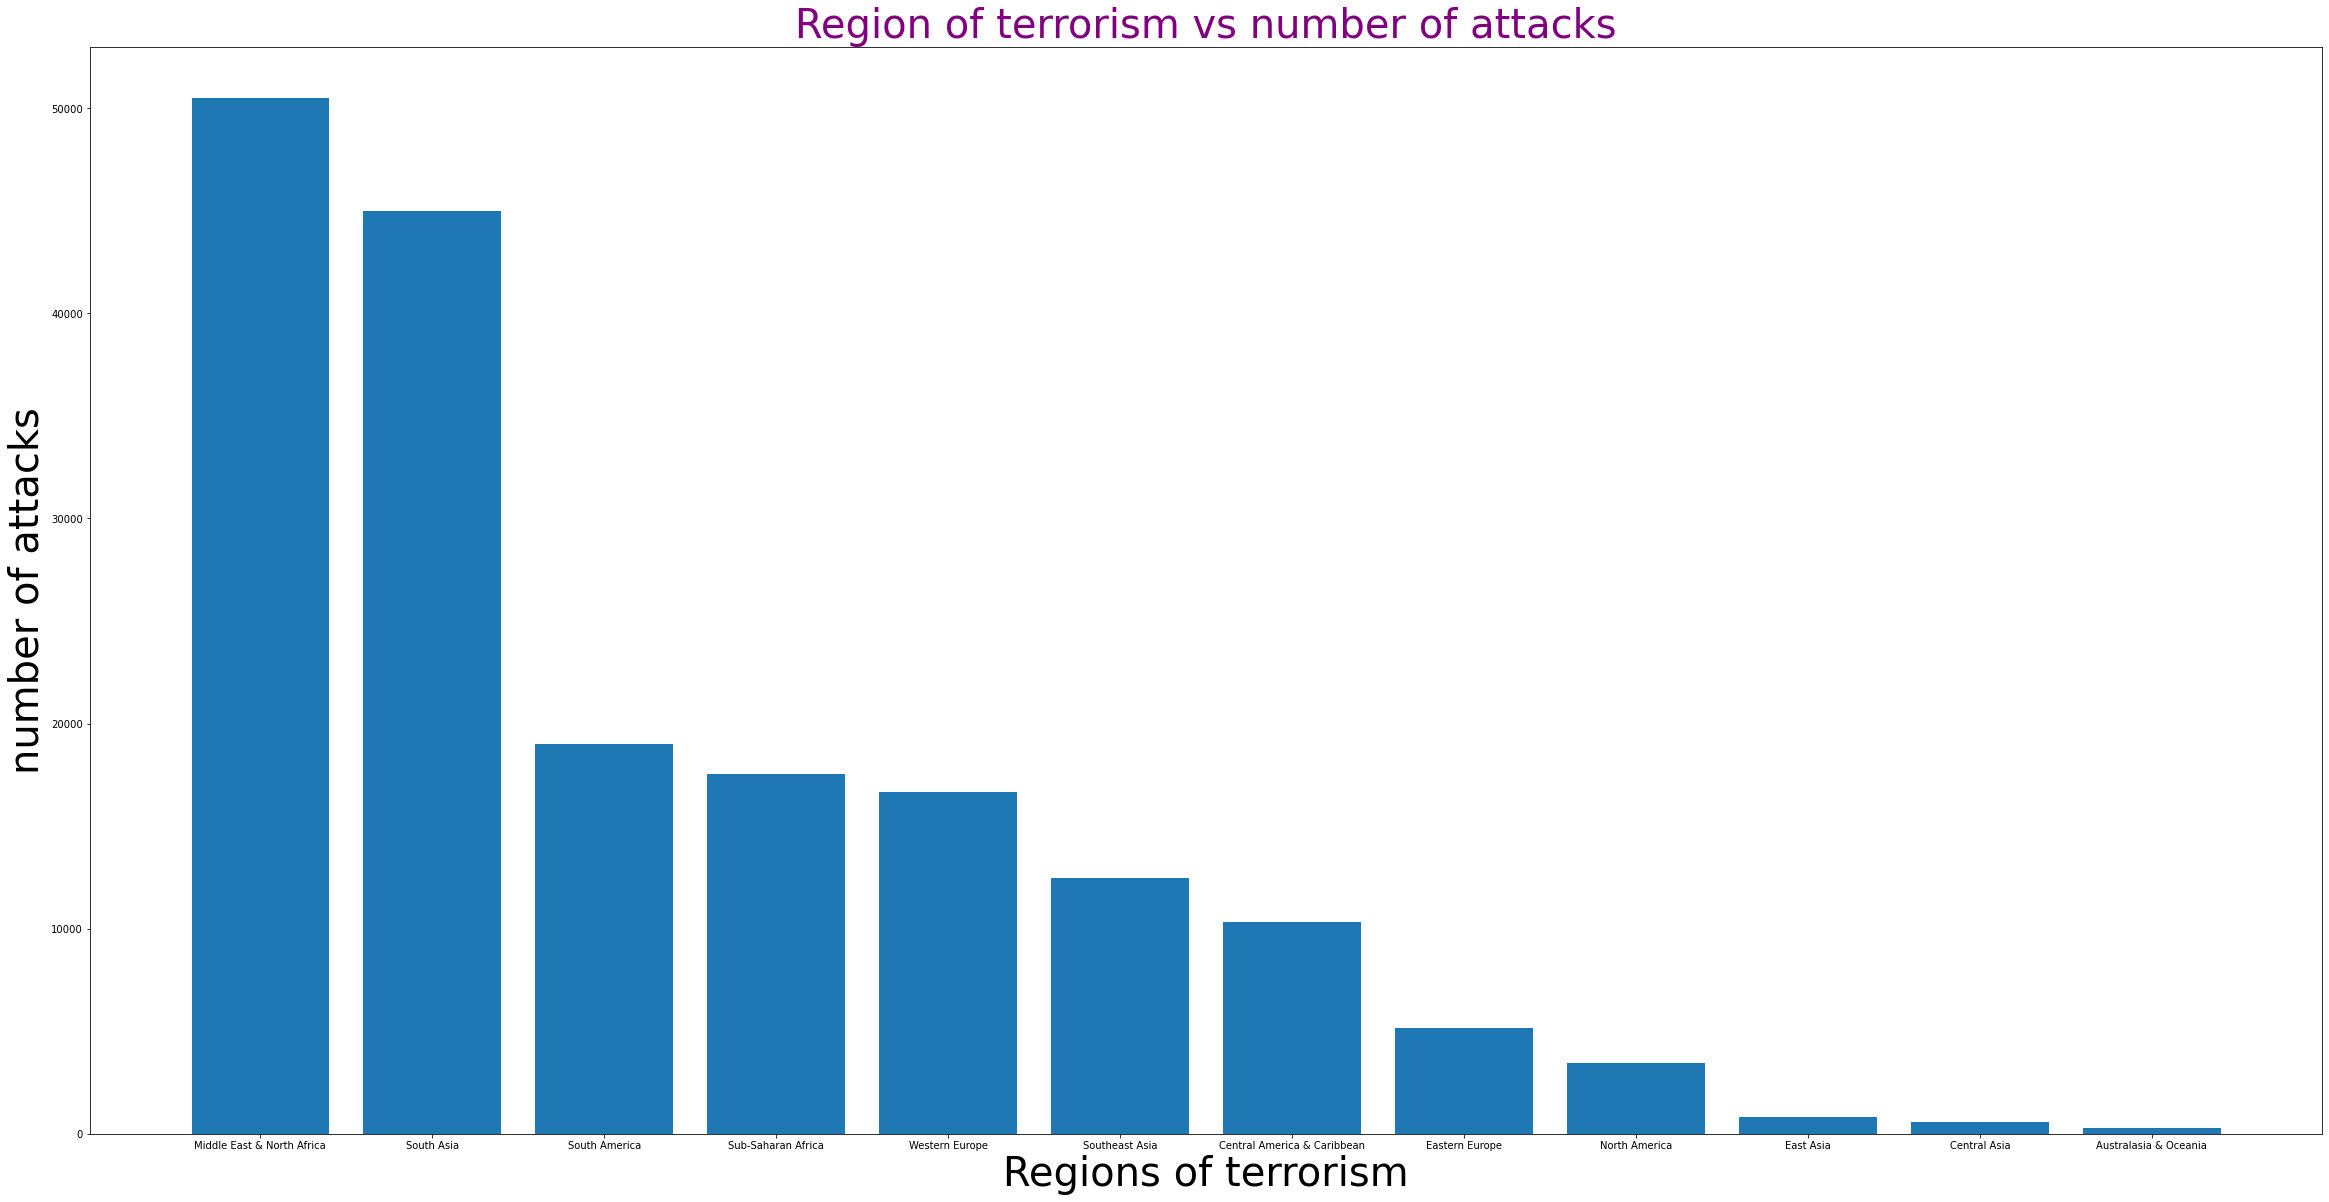

In [9]:
#getting the regions names which were unique
regions = data.region_txt.value_counts().index

#getting the value of respective name
attack_in_regions  = data.region_txt.value_counts().values

plt.figure(figsize = (40, 20))
plt.bar(regions , attack_in_regions , width =0.8)
plt.xlabel("Regions of terrorism" , fontsize ="40")
plt.ylabel("number of attacks" , fontsize =" 40")
plt.title("Region of terrorism vs number of attacks" , color = "purple" , fontsize = "40")



Text(0.5, 1.0, 'country of terrorism vs number of attacks')

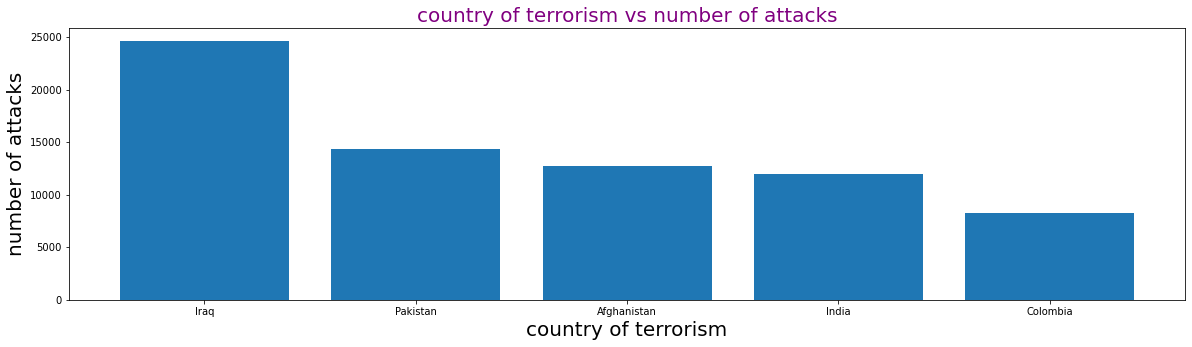

In [10]:
#getting the country names which were unique
countrys = data.country_txt.value_counts().head(5).index

#getting the value of respective name
attack_in_country  = data.country_txt.value_counts().head(5).values

plt.figure(figsize = (20 , 5))
plt.bar(countrys , attack_in_country , width =0.8)
plt.xlabel("country of terrorism" , fontsize ="20")
plt.ylabel("number of attacks" , fontsize ="20")
plt.title("country of terrorism vs number of attacks" , color = "purple" , fontsize = "20")

#### Above we saw the barplot for country/regions vs attack.  (Top 5 countries )

In [11]:
print(f"This data has terrosism data beginning from {data.iyear.min()} to {data.iyear.max()}.")

This data has terrosism data beginning from 1970 to 2017.


### Now we are going to figure out the people dying due to the terrorism each year

In [12]:
#select multiple column
no_of_kill = data[["iyear" , "nkill"]]


#groupby year and sum the kill of each year
no_of_kill = no_of_kill.groupby("iyear")['nkill'].sum()


#convert the object in the DataFrame
data1 = pd.DataFrame(no_of_kill)


data1.tail()

,nkill
iyear,
2013,22273.0
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0


In [13]:
#sorting value based on nkill for ploting and inplace =  true means
data1.sort_values('nkill' , ascending =  False , inplace =  True)

data1.reset_index(inplace =  True)

data1.tail()

,iyear,nkill
42,1974,539.0
43,1977,456.0
44,1973,370.0
45,1970,174.0
46,1971,173.0


C:\Users\Ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Year vs kill in world')

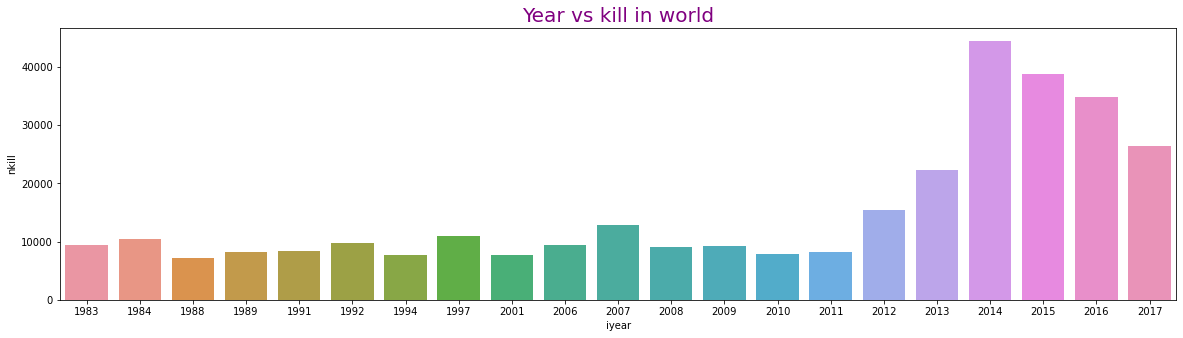

In [46]:

data1  = data1.loc[:20]
plt.figure(figsize = (20 , 5))
sns.barplot(data1.iyear , data1.nkill)
plt.title("Year vs kill in world" , color = "purple" , fontsize = "20")


### we can see that most people has died in 2014 and it was a massive jub in the number of deaths since 1983 and from then to now number of people dying is not decresing significantly.

#### What kind of group is more active in world for these attacks ?  Let's explore

C:\Users\Ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Year vs kill in world')

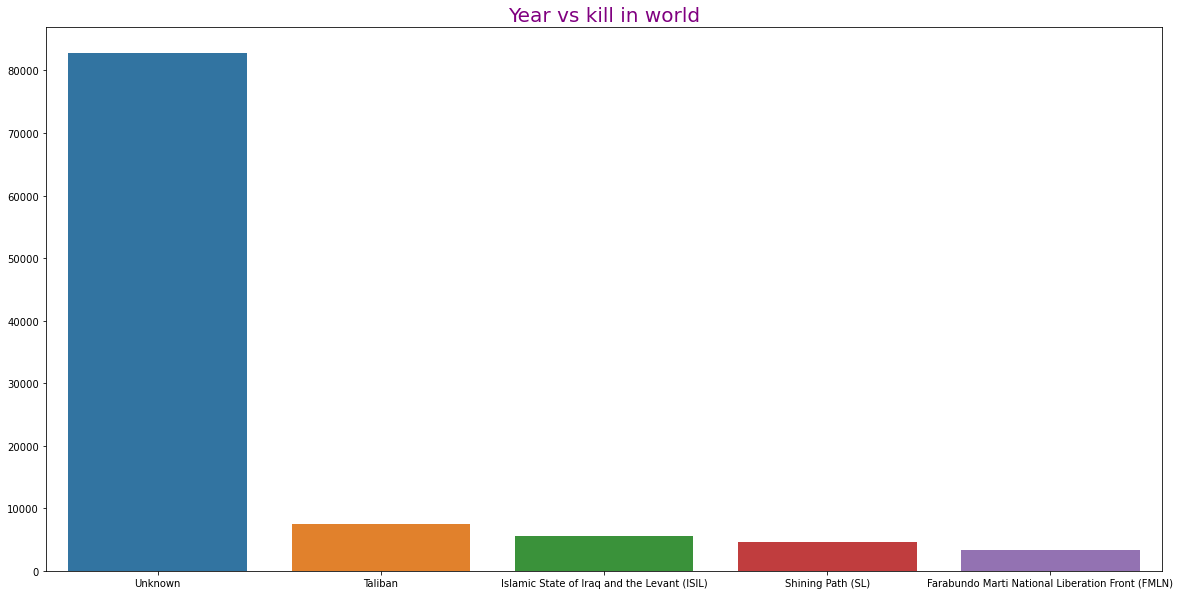

In [21]:
x =  data.gname.value_counts().head().index
y  =  data.gname.value_counts().head().values

plt.figure(figsize = (20 , 10))
sns.barplot(x,y)
plt.title("Year vs kill in world" , color = "purple" , fontsize = "20")

#### So we can see that first most prominent type of attack is unknown but Taliban and ISIL is following.

### Let's Explore datas in Nepal

In [17]:
#select all rows where country is Nepal
data2 = data[data.country_txt == "Nepal"]

### We are going to analyse following aspects of regarding the terrorist activities in Nepal

1. Number of deaths in various years

2. Type of attack

3. Target type

In [24]:
print(f"Total death till now due to terrorist activities in Nepal is {data2.nkill.sum()}")

Total death till now due to terrorist activities in Nepal is 1969.0


In [81]:
#Get only two row iyear and nkill
data3 =  data2[["iyear" , "nkill"]]

#grouping by year and summing the kill number
deaths =  data3.groupby("iyear")["nkill"].sum()

#convert to dataframe
death =  pd.DataFrame(deaths)

death.head() , 


#resetting index
death.reset_index(inplace =  True)

death.columns

Index(['iyear', 'nkill'], dtype='object')

C:\Users\Ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Death in Nepal vs years')

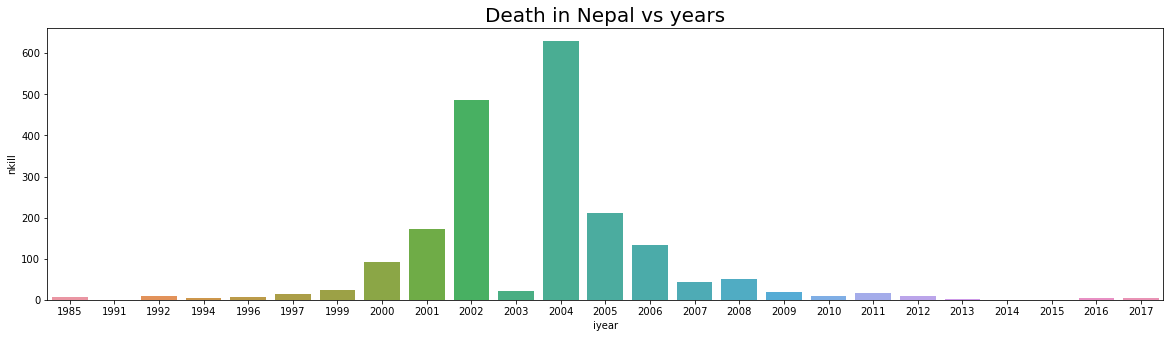

In [80]:
plt.figure(figsize = (20 , 5))
sns.barplot(death.iyear , death.nkill)
plt.title("Death in Nepal vs years" , fontsize = "20")


### From above figure we can see that most death was happeded in 2004 followed by 2002

In [25]:
data2.attacktype1_txt.value_counts()

Bombing/Explosion                      614
Armed Assault                          191
Facility/Infrastructure Attack         138
Hostage Taking (Kidnapping)            112
Assassination                          104
Unknown                                 45
Unarmed Assault                          8
Hostage Taking (Barricade Incident)      2
Hijacking                                1
Name: attacktype1_txt, dtype: int64

### Mostly Bombing Explosion and Armed Assult was responsible for attacks occoured in Nepal

In [ ]:
data2.gname.value_counts()

Text(0.5, 1.0, 'Major five types of attacks seen in Middle east')

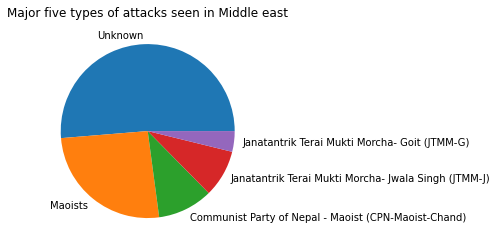

In [18]:
y = data2.gname.value_counts().head(5).values


mylabels = data2.gname.value_counts().head(5).index


plt.pie(y , labels = mylabels)

plt.title("Major five types of attacks seen in Middle east")

##### 

### Finally i had also plotted a pie chart to show the Major party involved in assult activites: They were mostly Moist